 # Exploratory Data Analysis of the World Happiness Report

## Introduction
This notebook performs an exploratory data analysis (EDA) of the World Happiness Report. The goal is to understand the variables that influence happiness across different countries and their key points.


## Importing Libraries
First, we import the necessary libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# First Look Of The Data

## Loading the Data
Let's load the happiness dataset and display the first few rows to understand its structure.

In [2]:
# removing the warnings
warnings.filterwarnings('ignore')
# reading the file
csv_path = 'files/2019.csv'
df = pd.read_csv(csv_path)
# showing the data
df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [3]:
# checking that all data is of the right type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
# first data statistics
df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [5]:
# checking if have null values for clean
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
# checking for duplicate data
df.duplicated().sum()

0

# Data visualization

## Histogram Plot for Happiness Score 

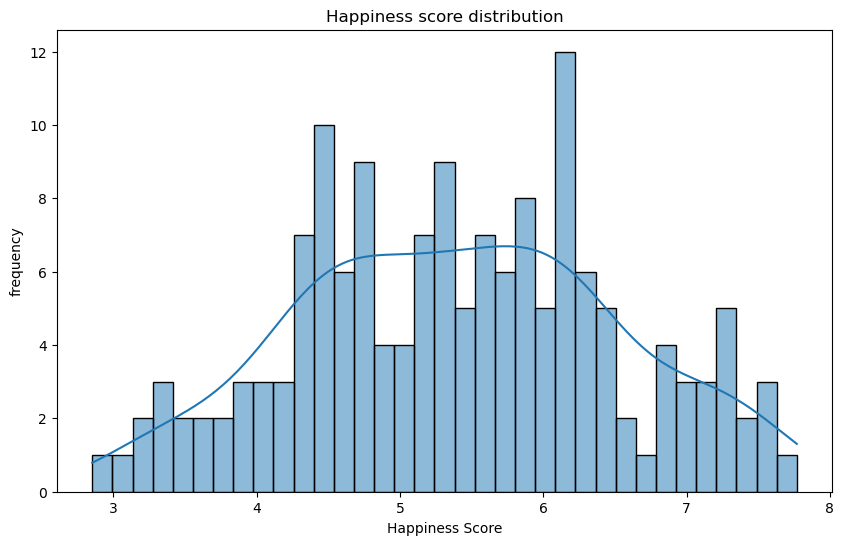

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=35, kde=True)
plt.title('Happiness score distribution')
plt.xlabel('Happiness Score')
plt.ylabel('frequency')
plt.show()

## Insights
- We see that there is no clear pattern in the grap 
- An average score between 4 and 6.

## Bar Plot 

In [8]:
# Creating the dataframe filters for the top 5 Happiest country
df_filter_high = df.sort_values(by='Score',ascending=False)
df_filter_high = df_filter_high.iloc[0:5]

In [9]:
# Top 5 Saddest
df_filter_low = df.sort_values(by='Score',ascending=True)
df_filter_low = df_filter_low.iloc[0:5]

Text(0, 0.5, 'Happiness Score')

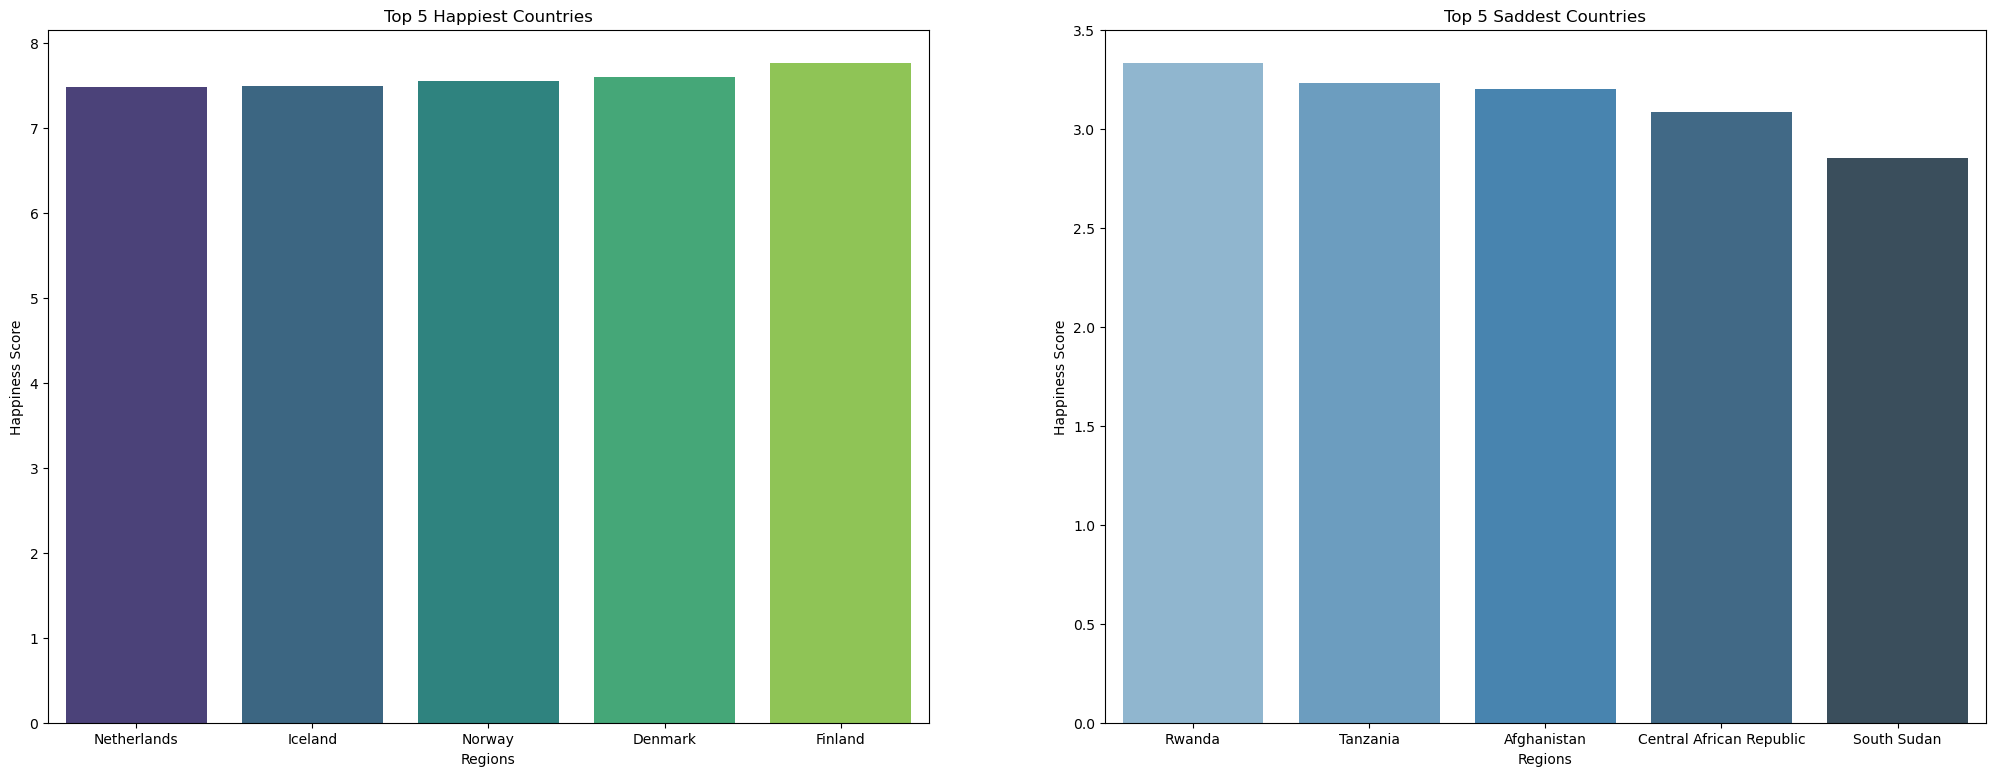

In [10]:
# Subplot for side-by-side viewing
fig,axs = plt.subplots(1,2,figsize=(25,9))
sns.barplot(y='Score', x='Country or region',data=df_filter_high.sort_values(by='Score',ascending=True),palette='viridis',ax = axs[0])
axs[0].set_title('Top 5 Happiest Countries')
axs[0].set_xlabel('Regions')
axs[0].set_ylabel('Happiness Score')
sns.barplot(y='Score', x='Country or region',data=df_filter_low.sort_values(by='Score',ascending=False),palette='Blues_d',ax = axs[1])
axs[1].set_title('Top 5 Saddest Countries')
axs[1].set_xlabel('Regions')
axs[1].set_ylabel('Happiness Score')

## Insights

### All of the top 5 Happiest countries have the same caracteristics:
- High Quality of Life: These countries consistently rank highly in global happiness and quality of life indexes.
- Strong Social Welfare Systems: They have comprehensive social safety nets and public services, including healthcare and education.
- High Levels of Trust and Social Cohesion: These nations exhibit high levels of trust in government and societal institutions.
- Progressive Policies: They are known for their progressive policies on issues like gender equality, environmental sustainability, and human rights.
- Stable Economies: They have strong, stable economies with high GDP per capita and low levels of corruption.
  


### Same logic for the top 5 Saddest:
- Low Human Development Index (HDI): These countries often rank low on the HDI, indicating challenges in health, education, and standard of living.
- Economic Challenges: They face significant economic issues, including low GDP per capita and high levels of poverty.
- Political Instability and Conflict: Many of these nations have experienced political instability, conflict, or civil unrest.
- Development Aid: They rely heavily on international aid and development assistance.
- Health Issues: They often deal with major public health challenges, including high rates of infectious diseases and limited healthcare infrastructure.

## Comparing the Contrast

In [11]:
# Filtering for display only the happiest and the saddest country
filter_df = df[(df['Country or region'] == 'Finland') | (df['Country or region'] == 'South Sudan')]

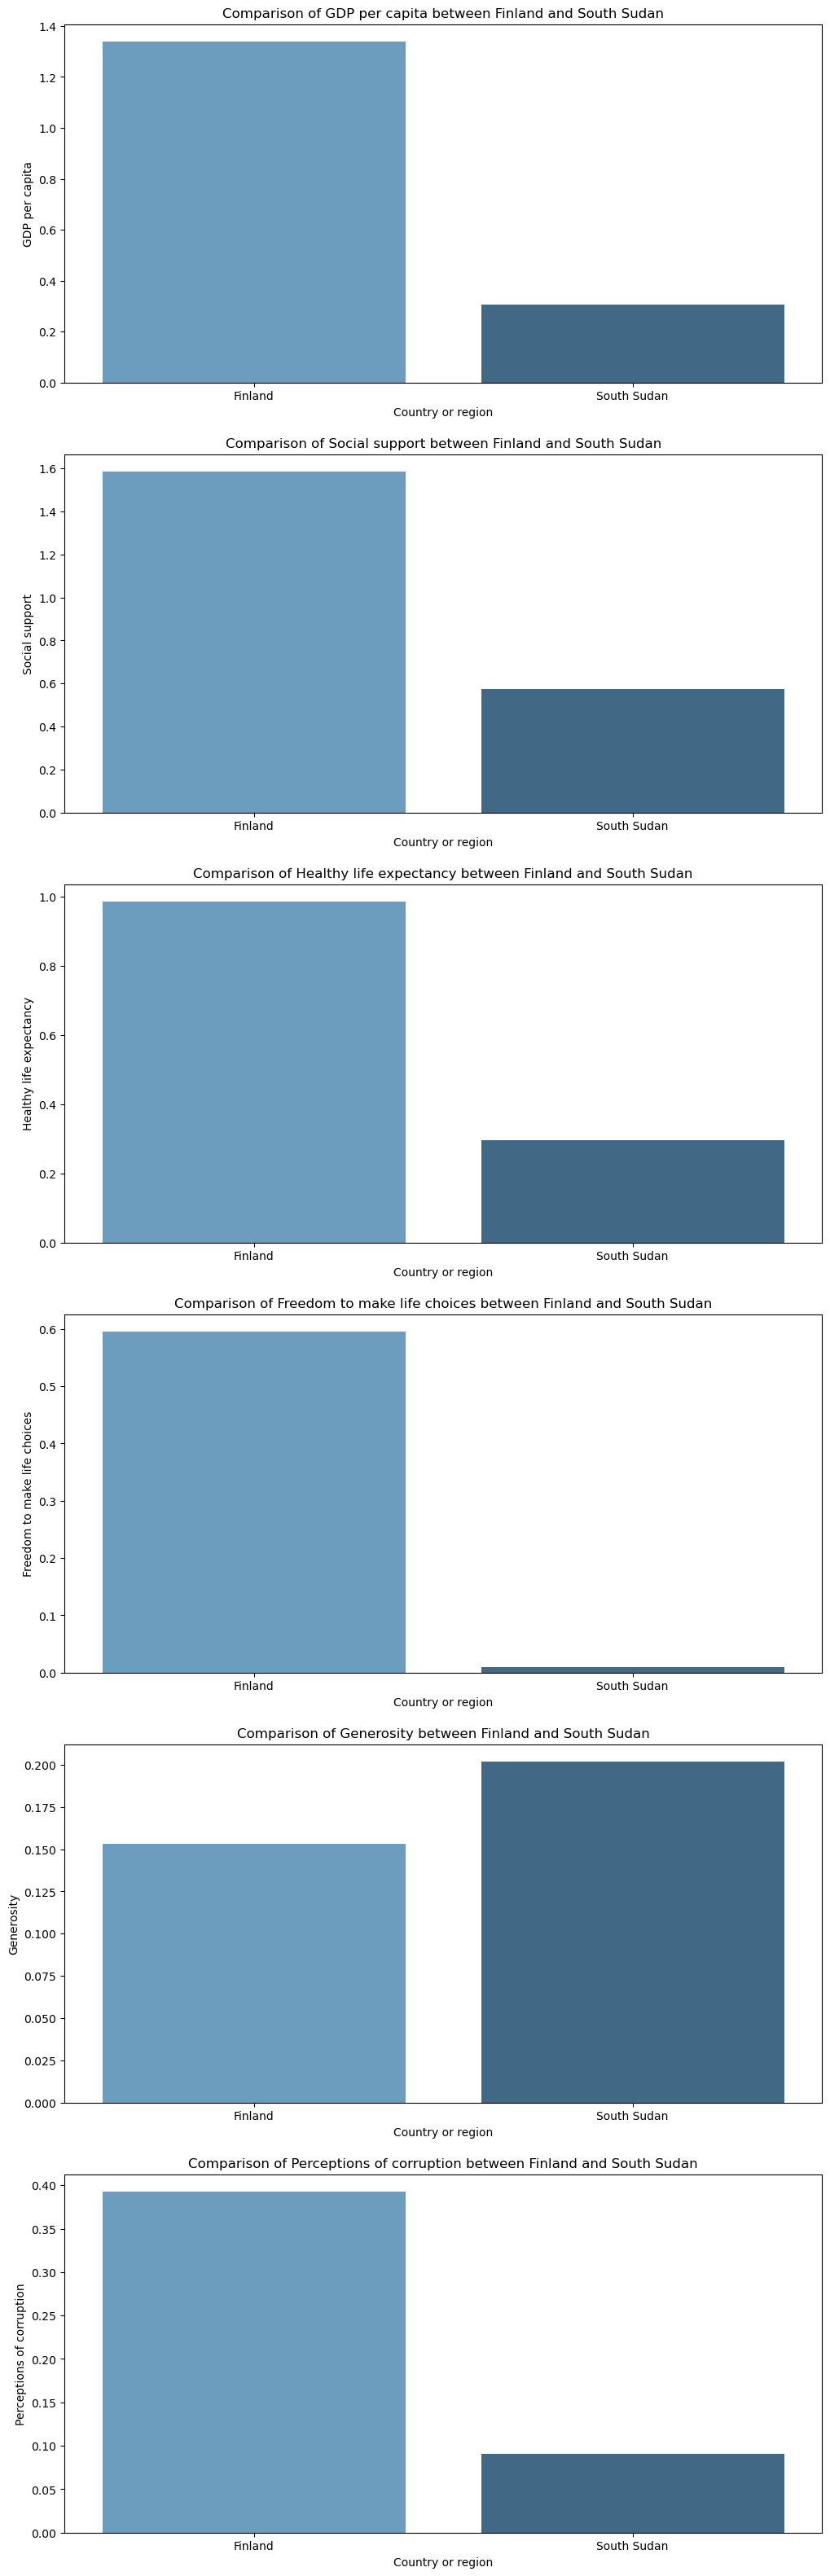

In [12]:
variables = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Creating subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(12, 40))

# Ploting each variable in one subplot
for i, variable in enumerate(variables):
    sns.barplot(x='Country or region', y=variable, data=filter_df, ax=axes[i],palette='Blues_d')
    axes[i].set_title(f'Comparison of {variable} between Finland and South Sudan')

## Insights

### The key factors are very visible:
- GPD per capta
- Social support
- Healthy life expectancy
- Freedom to make life choices


### However, have others key points:
Generosity does not depend on happiness:
- Cultural Differences: Cultural norms around generosity vary significantly across countries and do not necessarily translate to personal happiness.
- Economic Stability: Countries with higher economic stability might exhibit less need for personal generosity, focusing more on systemic support.
- Personal vs. Societal Metrics: Happiness is often influenced more by personal circumstances and societal factors like health, income, and governance rather than individual acts of generosity.
  
Corruption too:
- Adaptation and Resilience: People in highly corrupt societies may adapt and find contentment through other means.
- Perception Variance: Perceptions of corruption and its impact can vary widely, influencing its correlation with happiness.

### Correlation Plots

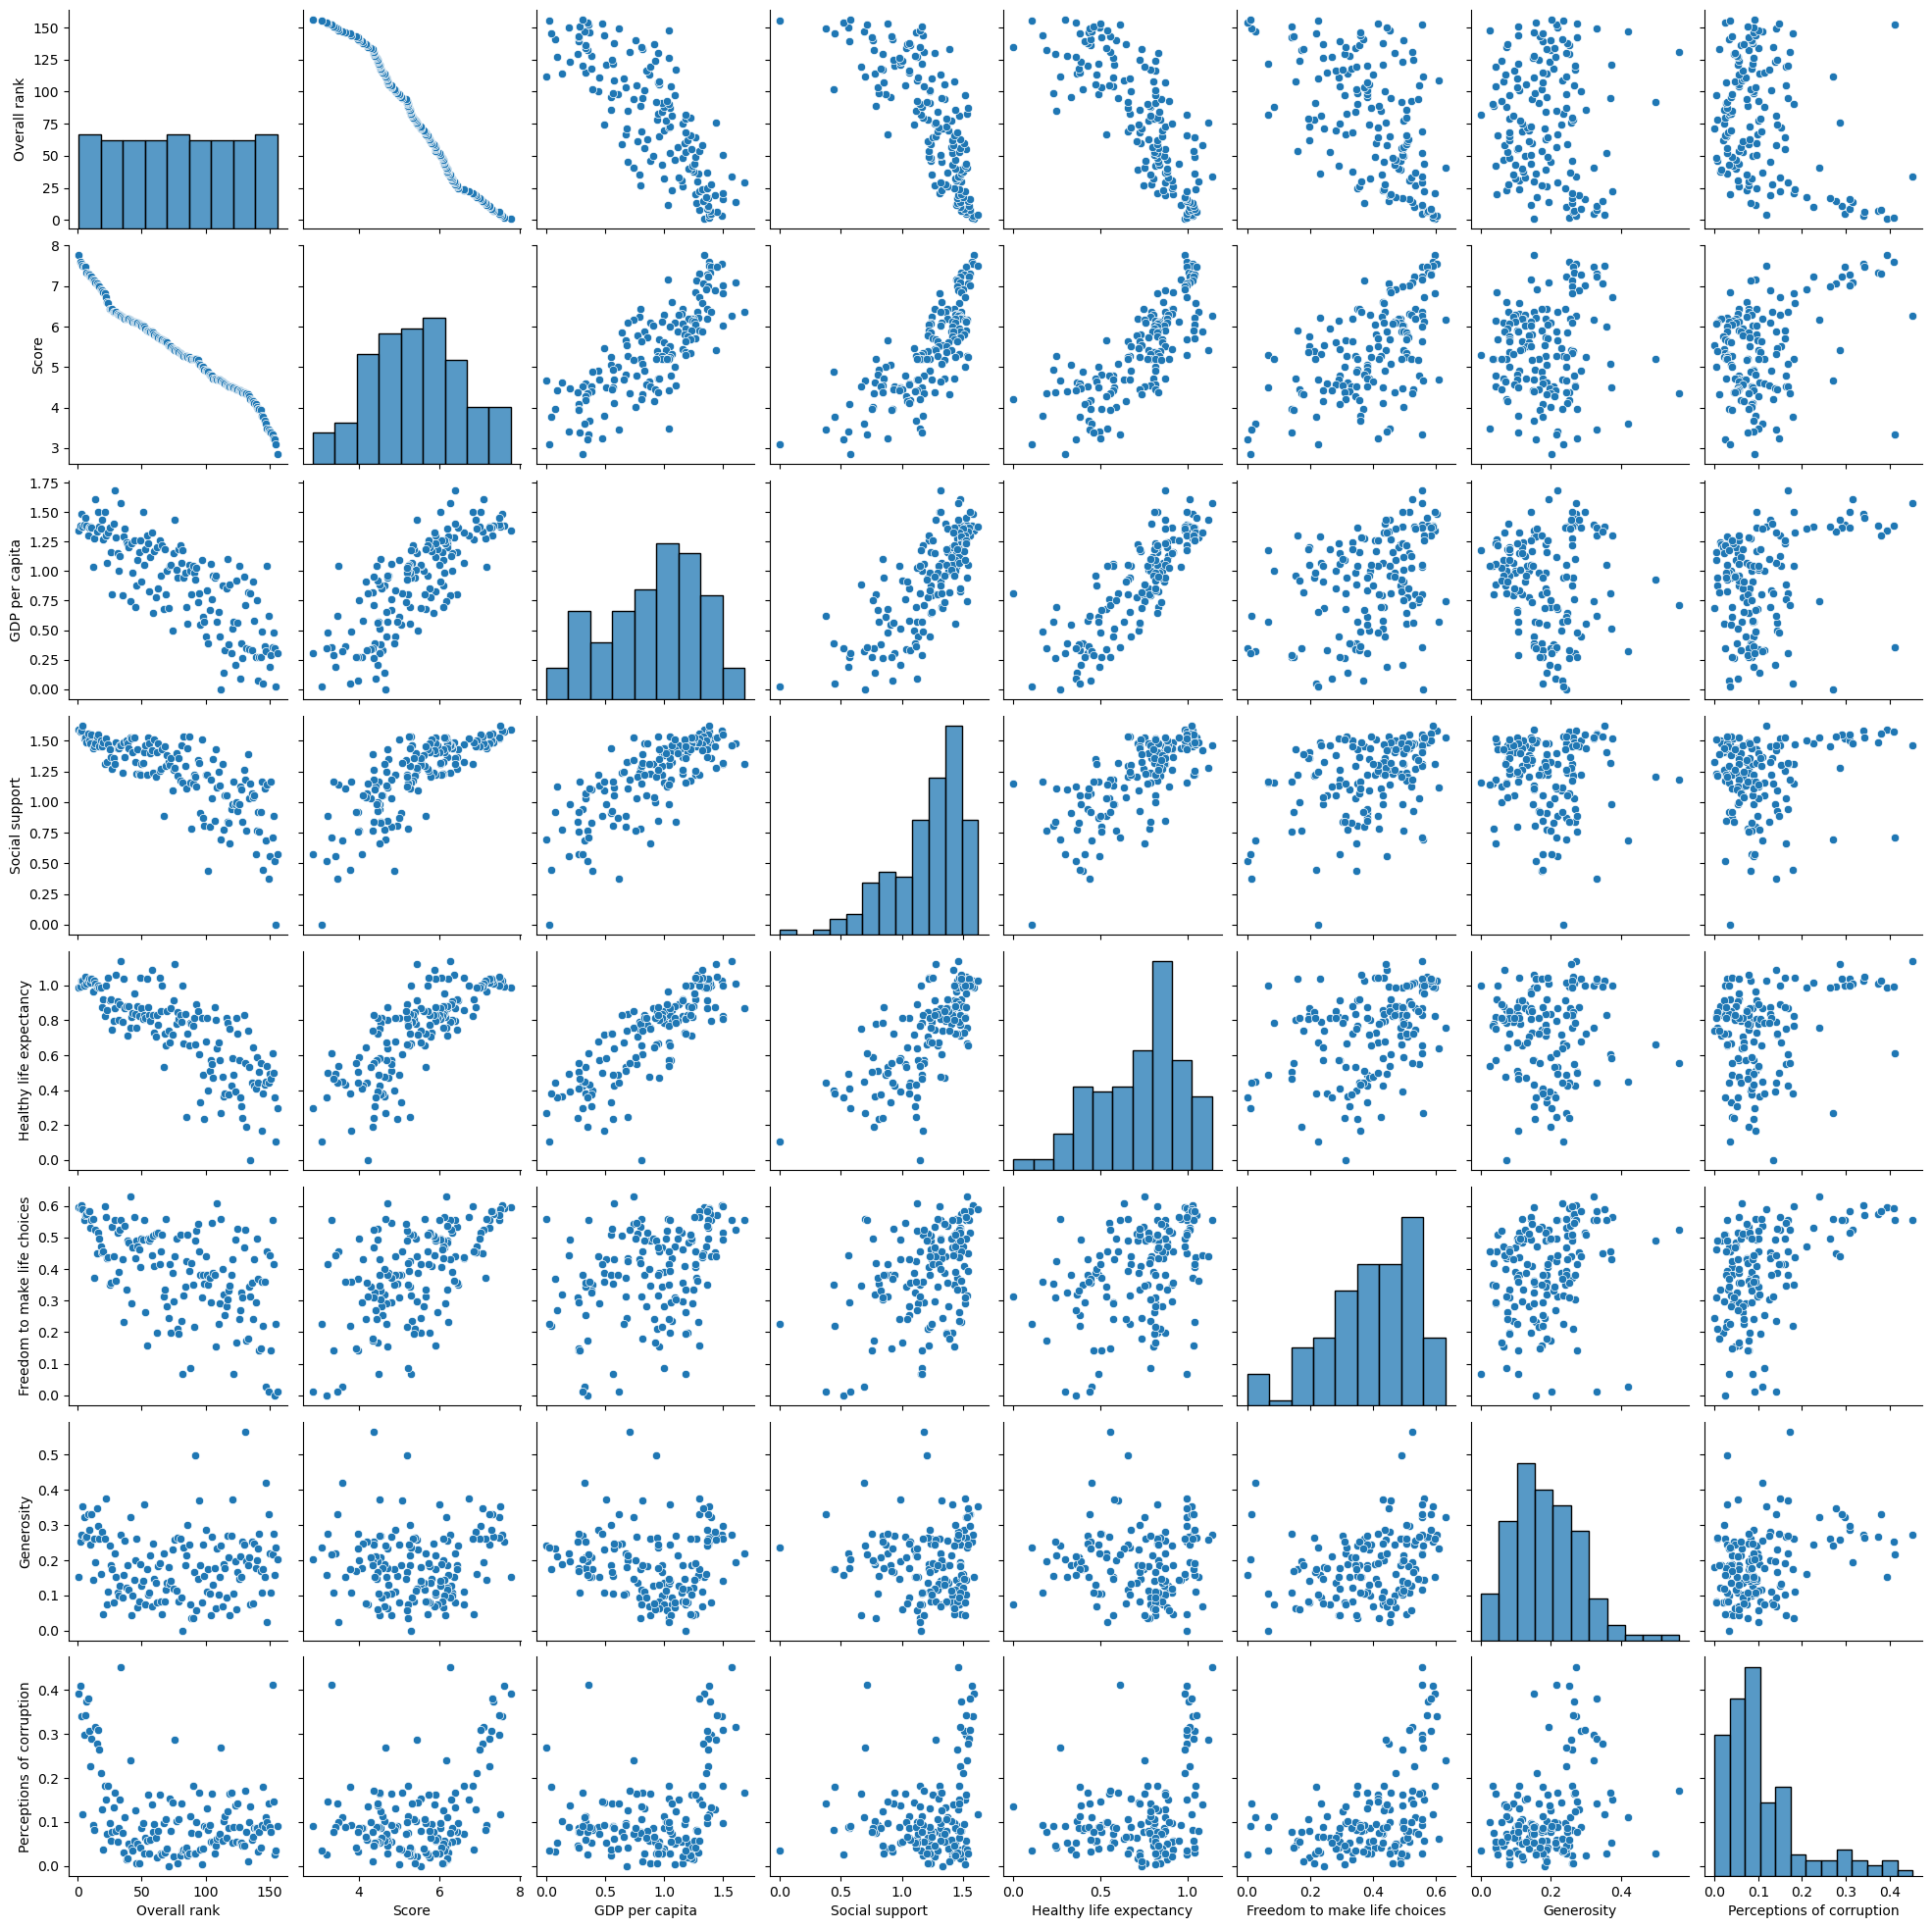

In [13]:
# Making a pairplot of all columns for bird eye vision
sns.pairplot(df)

In [14]:
# filtering the columns that are of interest to us
df_corr = df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr()

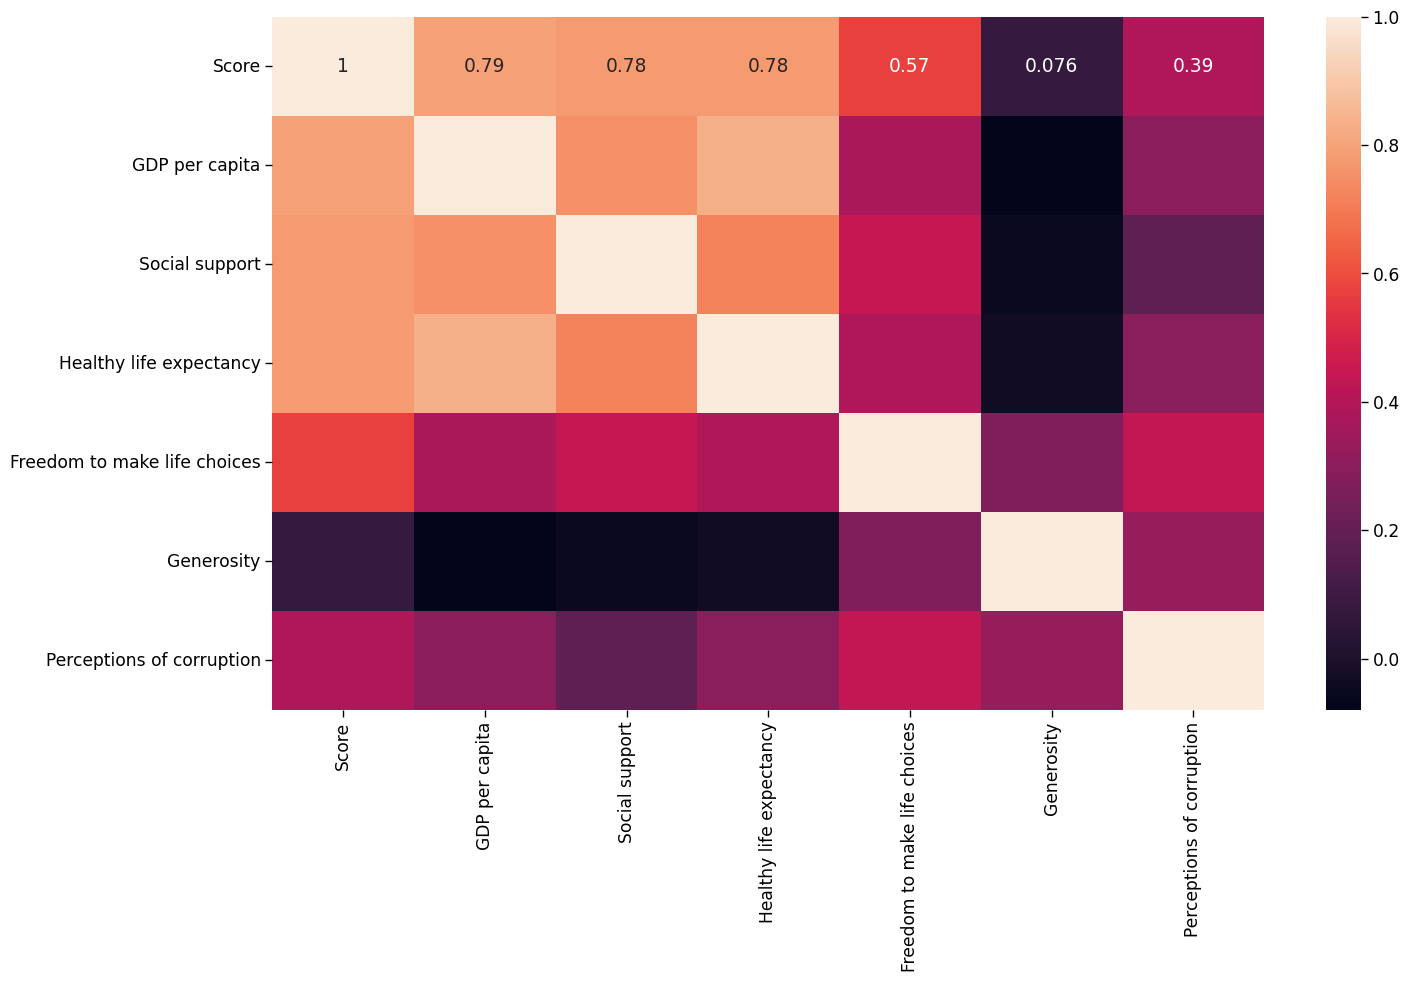

In [15]:
# Creating the heatmap
plt.figure(figsize=(16,9))
sns.set_context('paper',font_scale=1.4)
ax = sns.heatmap(df_corr, annot=True)

### Insights

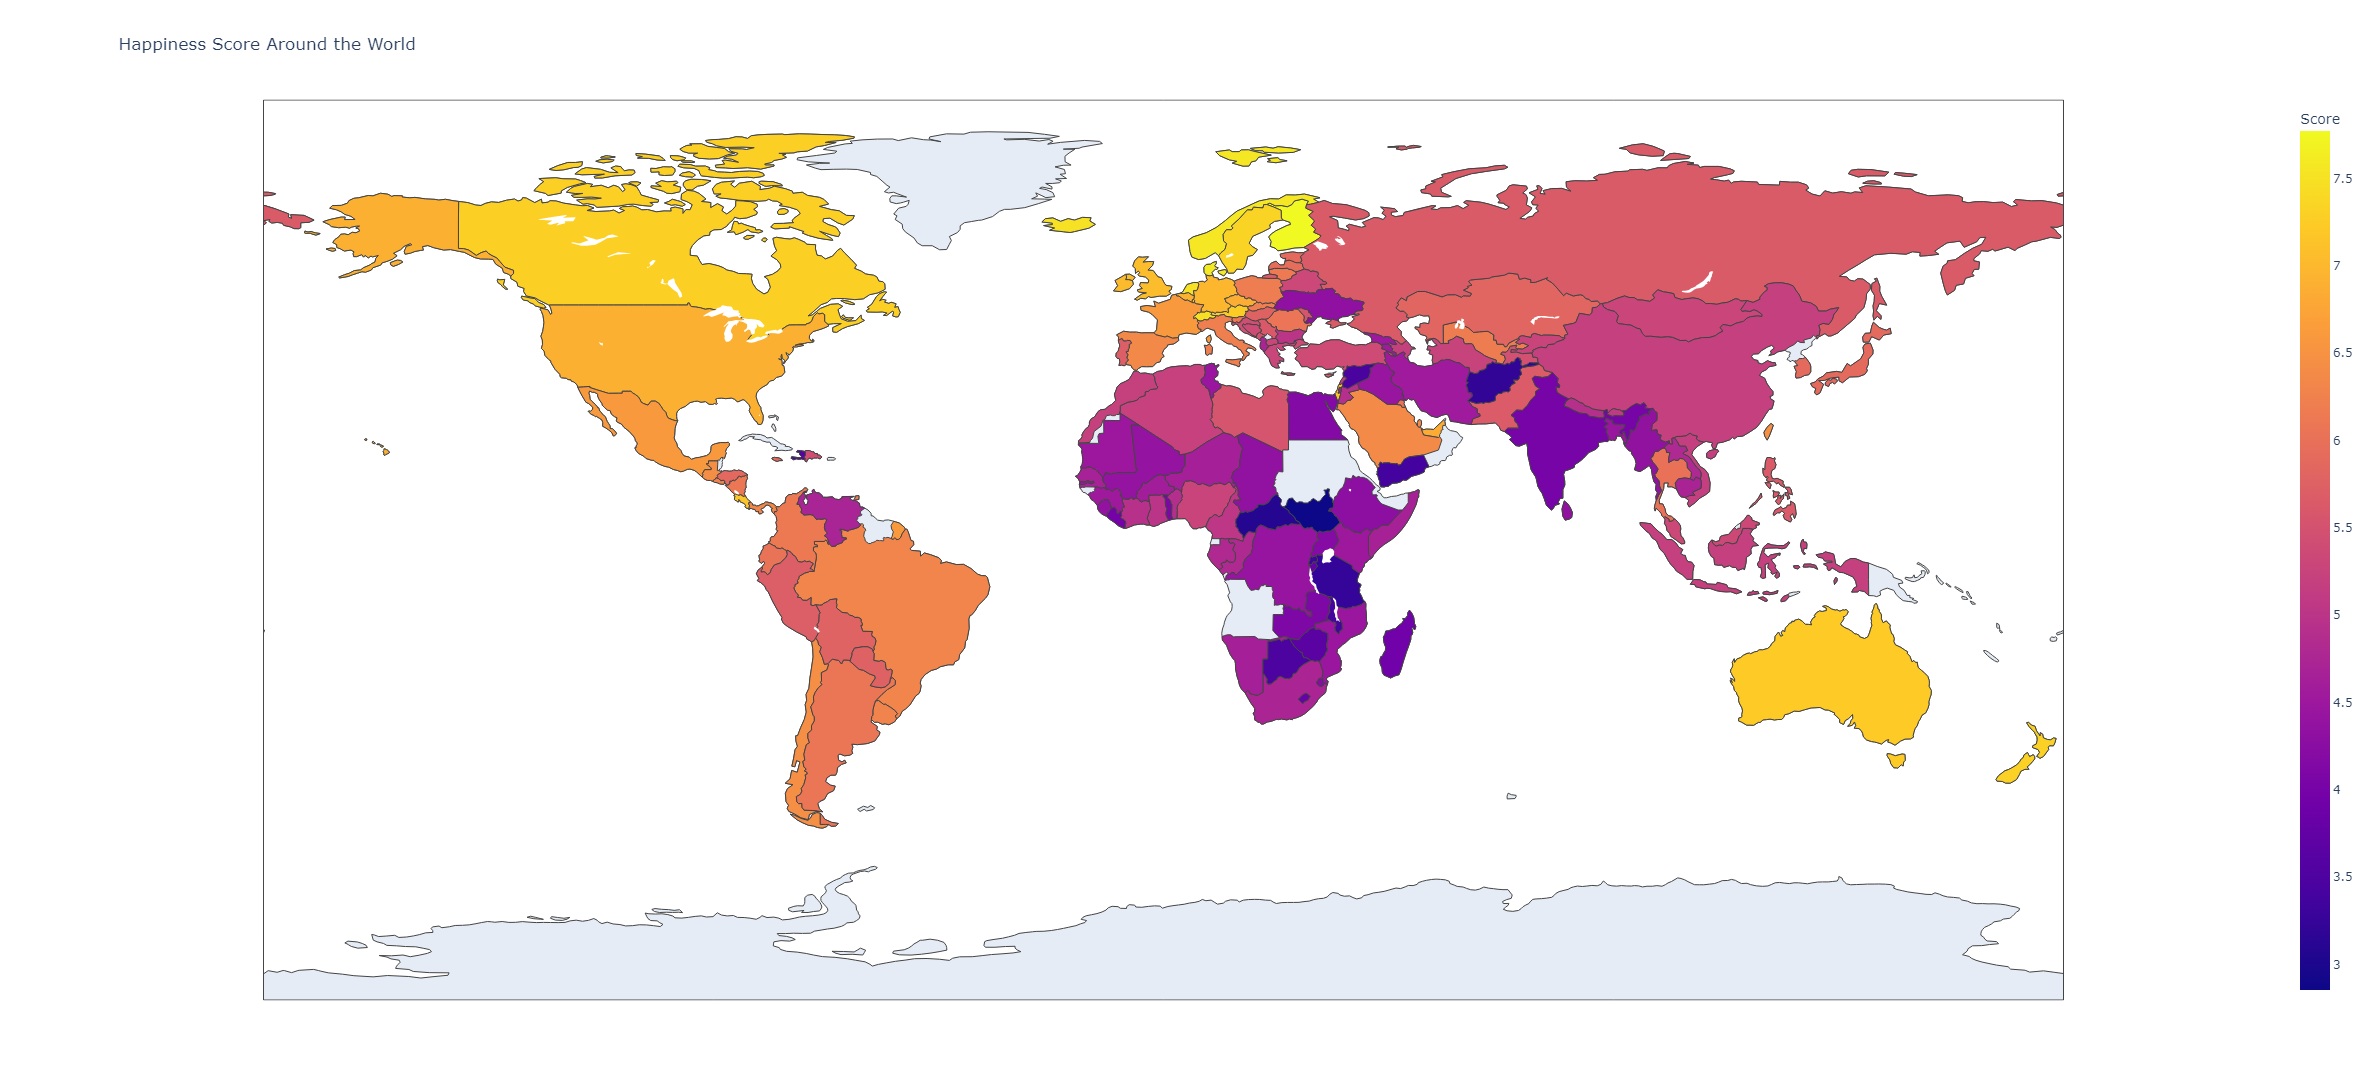

In [16]:
fig = px.choropleth(df,
                    locations='Country or region',
                    locationmode='country names',
                    color='Score',
                    hover_name='Country or region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Happiness Score Around the World',
                    width=1920, 
                    height=1080)
fig.show()

![Map 1](Files/Map1.png)

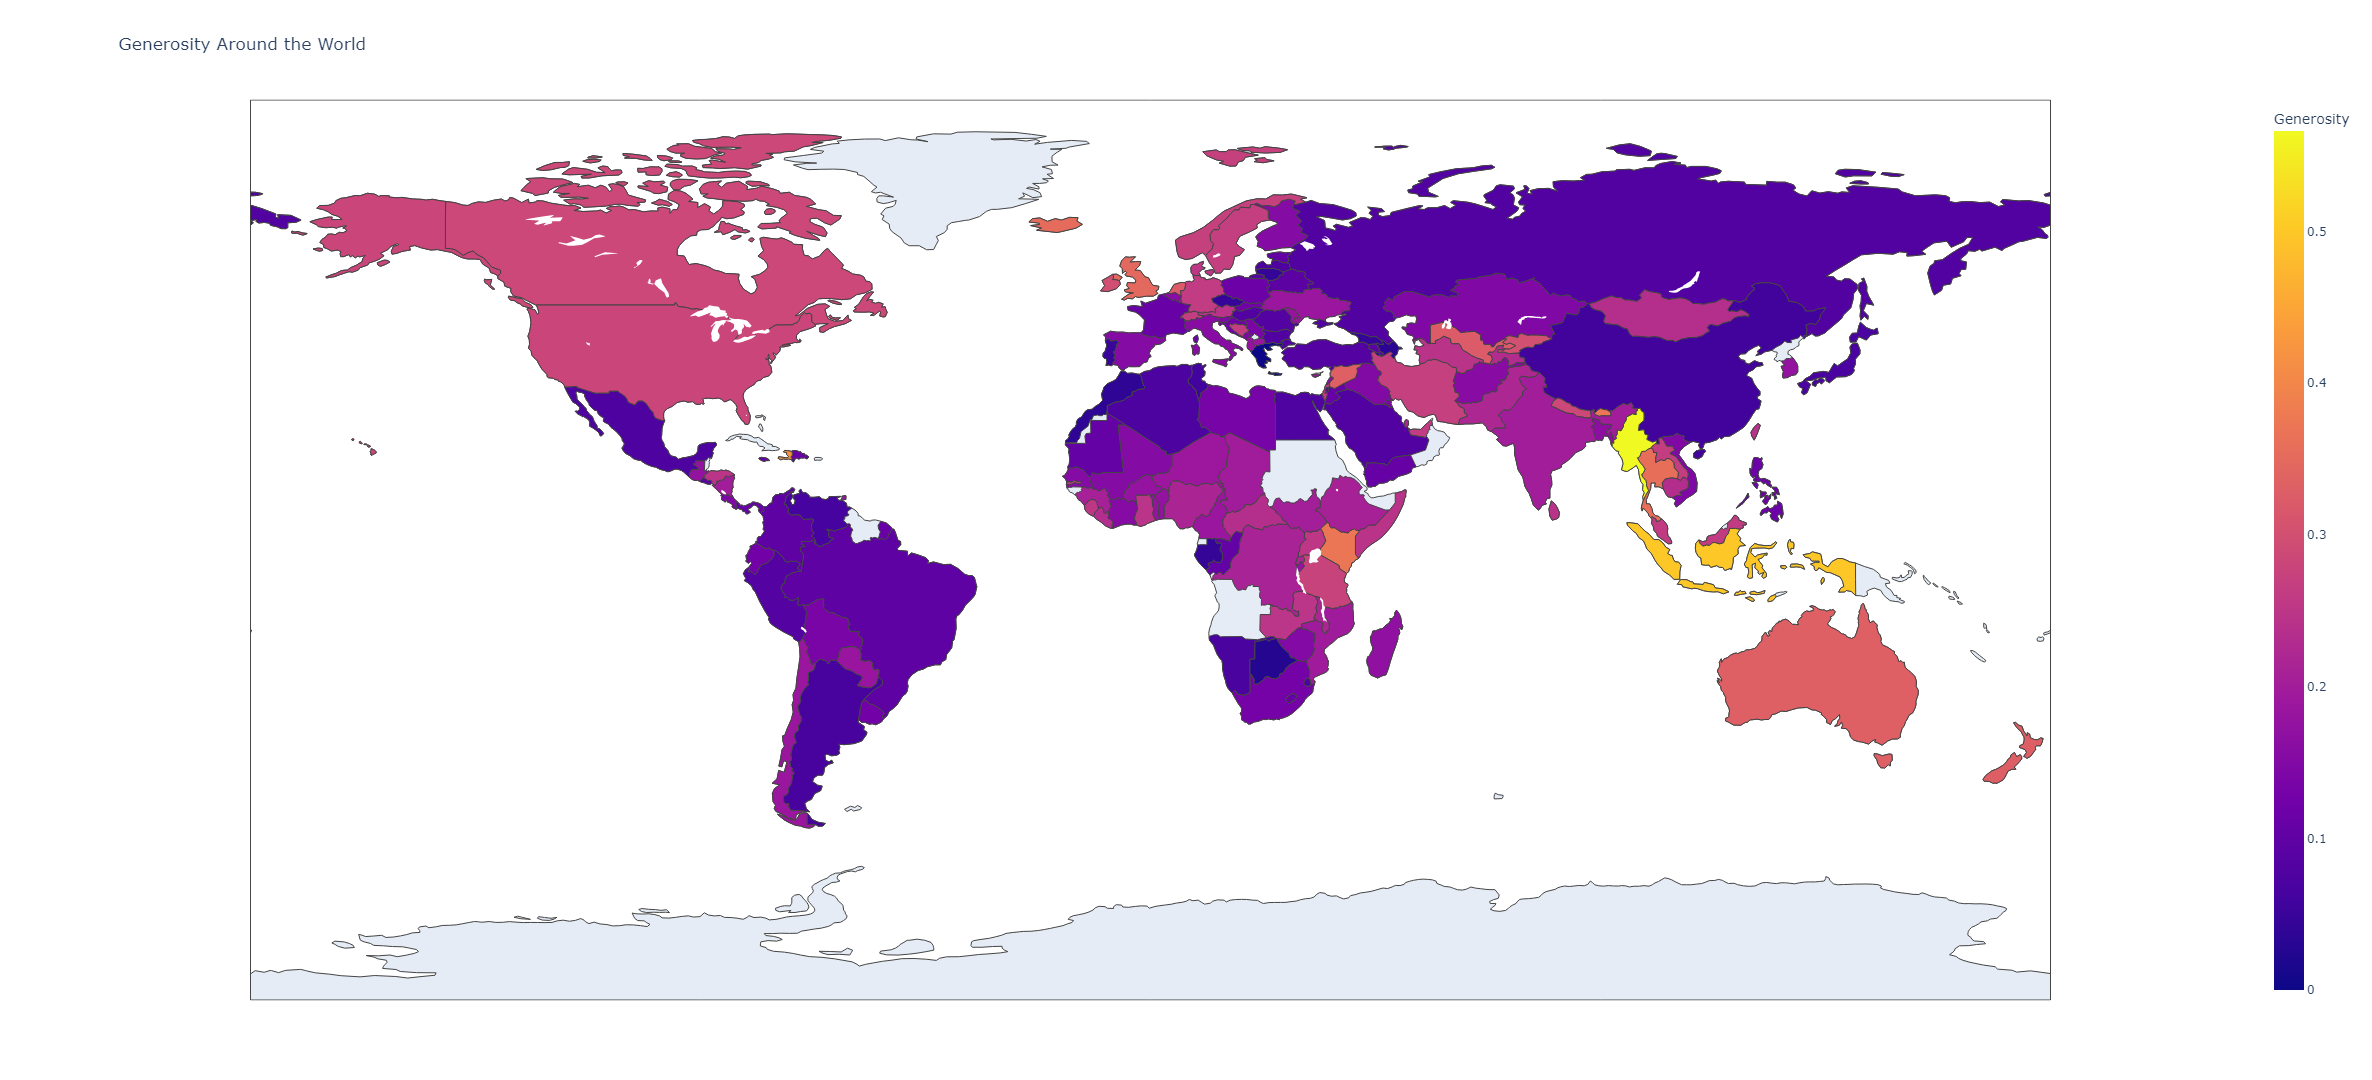

In [17]:
fig = px.choropleth(df,
                    locations='Country or region',
                    locationmode='country names',
                    color='Generosity',
                    hover_name='Country or region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Generosity Around the World',
                    width=1920, 
                    height=1080)
fig.show()

![Map2](Files/Map2.png)

In [18]:
df_filtered = df.sort_values(by='Score', ascending=False)
df_filtered_high = df_filtered.iloc[0:50]
df_filtered_low = df_filtered.iloc[-50:]

Text(0, 0.5, 'Density')

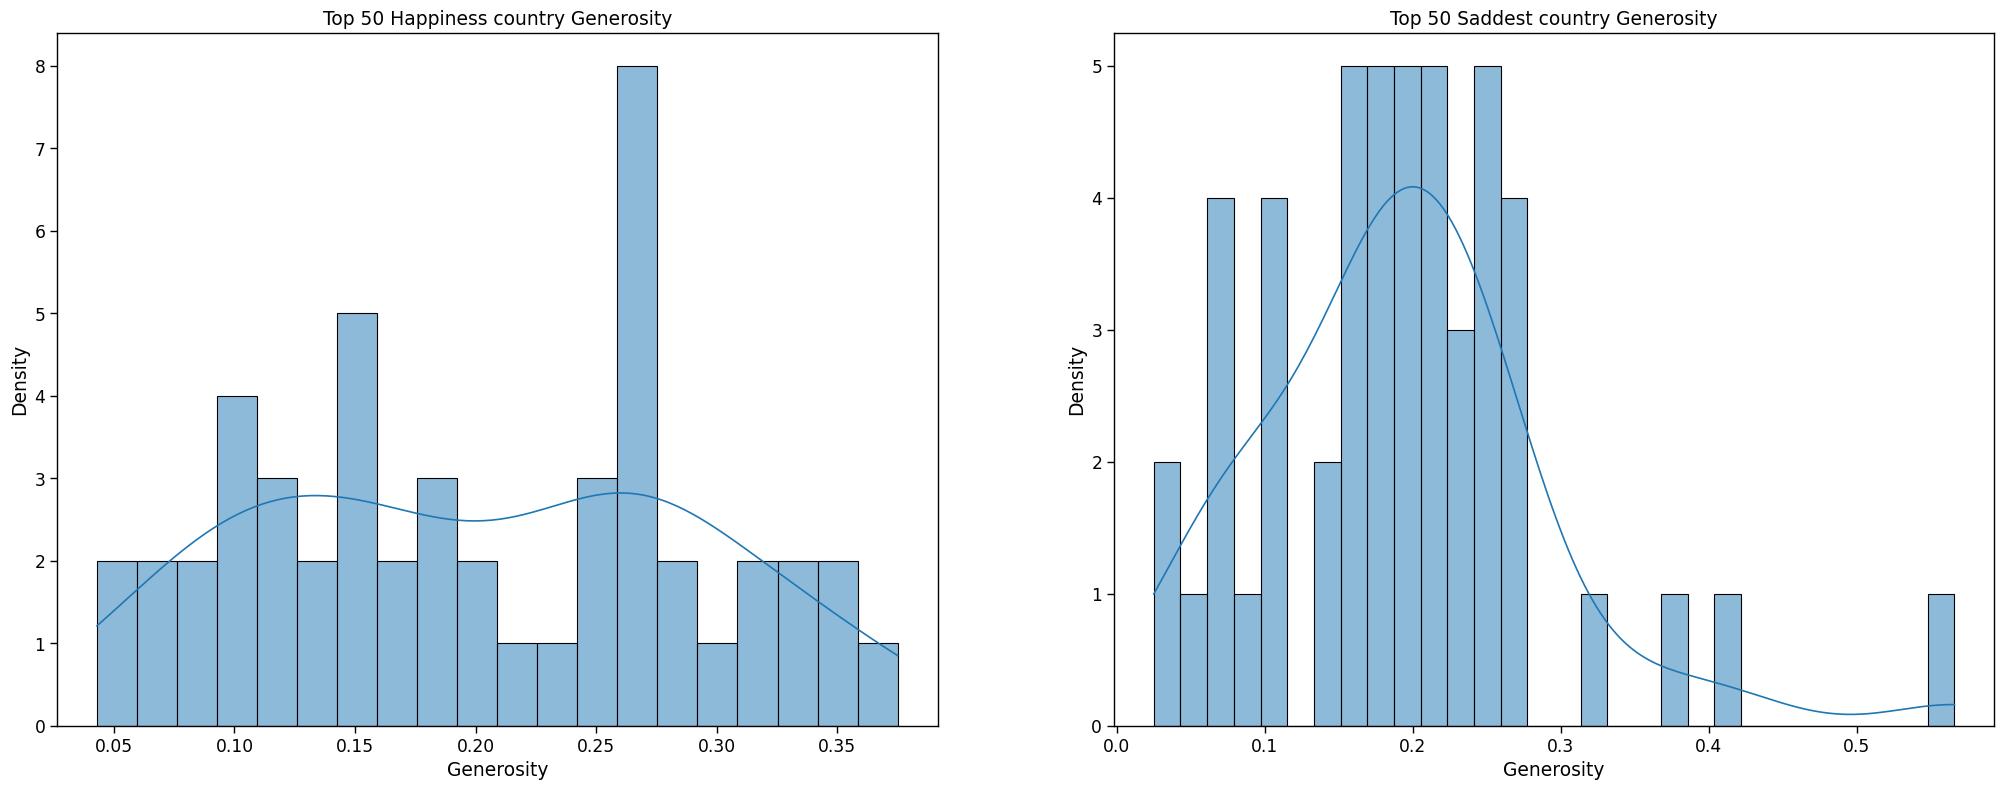

In [19]:
fig, axs = plt.subplots(1,2,figsize=(25,9))
sns.histplot(df_filtered_high['Generosity'], bins=20, kde=True, ax = axs[0])
axs[0].set_title('Top 50 Happiness country Generosity')
axs[0].set_xlabel('Generosity')
axs[0].set_ylabel('Density')
sns.histplot(df_filtered_low['Generosity'], bins=30, kde=True,palette='Blues_d', ax = axs[1])
axs[1].set_title('Top 50 Saddest country Generosity')
axs[1].set_xlabel('Generosity')
axs[1].set_ylabel('Density')